# Transmission spectroscopy

In this exercice we will analyze an exoplanet's transmission spectrum to study the content of its atmosphere.

## Context

The transit detection method allows to unveil the presence of a planet around a star by analyzing its photometric timeseries.
If the orbital plane of the planet is aligned with the observer's direction, the planet transits (i.e. passes between its host star and the observer) at each orbital period.
During the transit, the planet masks a part of the stellar disk which induces a decrease in the photometric curve.
Photometric surveys - such as Kepler, TESS, PLATO, NGTS, etc. - monitor many stars to detect 
these periodic transits.
This method allows in particular to measure the radius of the planet (actually the planet/star area ratio).

When the planet possesses an extended atmosphere, the "equivalent radius" measured with the transit method depends on the wavelength.
Indeed, depending on the atomic and molecular content of the atmosphere, the light is absorbed at specific wavelengths (absorption lines).
By comparing the spectra of the star during and outside of transit, one can deduce the absorption spectrum of the planet's atmosphere.

## Data

In this homework we will reproduce the study of Allart et al. (2018) -
which we refer to as A18 in the following -
to measure the helium absorption of the Neptune-mass exoplanet HAT-P-11 b.
The article and supplementary material are provided with this notebook.
Feel free to read it!
The planet HAT-P-11 b is very well studied, and has been detected both with the transit method and the radial velocity method.
Its orbital motion, mass, and "photometric radius" are well known.
A18 obtained observations with the CARMENES spectrograph before, during, and after a transit of the planet.
The CARMENES instrument is a near-infrared spectrograph installed at Calar Alto in Spain.
Using this instrument, the authors revealed the absorption by HAT-P-11 b's atmosphere
in the Helium I triplet - three spectral lines that are close to each other and correspond to Helium transitions - with different amplitudes of absorption in each of these lines.

The whole process of extraction of the absorption spectra is complex and long, so we will focus here on the last steps.
Let's briefly summarize the steps that were already done
(this is mainly for your curiosity, you don't need to understand the details to do the exercice):

- Correct each spectrum from telluric contamination (using a telluric atmospheric model).
- Put all the spectra in the stellar rest frame:  
Due to the presence of the planet, the star orbits around the center of mass of the system, which causes a periodic Doppler shift of the stellar spectra (which is very useful for the radial velocity detection method but annoying in our case).
The whole system also moves with respect to the solar system (systemic velocity), which causes a constant Doppler shift.
- Sum all out-of-transit spectra to obtain a high SNR (signal to noise ratio) spectrum of the star (the master spectrum).
- Rescale each spectrum (in and out of transit) such as the continuum is at the level of the continuum in the master spectrum
- Compute the absorption spectrum by substracting each individual spectrum to the master one.
At this step, the out-of-transit spectra should have values spreading (due to noise) around 0.
The in-transit spectra should have values around 0 in the continuum and positive values in the planet's absorption lines.
- Divide each spectrum (in and out of transit) by the master spectrum such as the absorption is in relative units (a value of 1 at a given wavelength would mean that the planet's atmosphere completely absorbs the light from the star at this wavelength).

The important information to remember is that we obtain absorption spectra at successive orbital phase (before, during and after the transit) that correspond to the excess absorption of the planet's atmosphere at a given wavelength in relative units (0 = no absorption from the atmosphere, 1 = light from star completely absorbed).
Negative numbers, and number above 1 are possible, due to the noise in the measurements.

The data corresponding to these absorption spectra are available in the directory "data" on the moodle page.
Each file is an individual spectrum.
The columns are:

- beginning of pixel (wavelength in ${\buildrel _{\circ} \over {\mathrm{A}}}$ and in the stellar rest frame)
- end of pixel (wavelength in ${\buildrel _{\circ} \over {\mathrm{A}}}$ and in the stellar rest frame)
- absorption in the pixel
- error on the absorption (standard deviation)
- exposure date (BJD - $2.4\times 10^{6}$)

The last column (exposure date) has only two lines that are defined.
The first line gives the start of the exposure, and the second line the end of the exposure (all the remaining lines are filled with zeros).

For the sake of simplicity, we only analyze a single transit of the planet,
while A18 combined the results of two transits to confirm the detection
and obtain more accurate results.
Therefore, you should obtain similar but not identical results as in A18.

## Aim

The aim of this exercice is to reproduce Figs. 1 and 2 of A18,
i.e. obtaining a high SNR absorption spectrum of the planet
by stacking all in-transit spectra.
A particular focus will be given to the correct propagation of errorbars, and to the computation of the covariance matrix of the transmission spectrum of the planet.

## Black boxes

In order to avoid loosing to much time on side tasks, a few useful python functions are provided in the tools.py file.
Do not hesitate to look at their implementation to understand it!

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import tools
import os
path = os.getcwd()

### Physical and orbital parameters of the HAT-P-11 system
Taken from the supplementary material, Table S1 of A18

In [2]:
P_d = 4.887802443 # orbital period (in d)
T0_d = 54957.8132067 # time of mid-transit (in BJD - 2.4e6)
T14_d = 0.0981875 # transit duration (in d)
K_m_s = 12.01 # semi-amplitude of the stellar radial velocity (in m/s)
e = 0.264353 # eccentricity
omega_rad = 342.1885794*np.pi/180 # argument of periastron (in rad)
Ms_Msun = 0.802 # stellar mass (in sun mass)
Mp_Msun = 27.74*tools.mEarth_Sun # planet mass (in sun mass)

### 1) Loading data

Use the np.genfromtxt function to read the file "data/HAT-P-11b_2017-08-12_22.rdb".
This should return a 2d numpy array (a matrix).

Compute the vector "lambda_mid" giving the wavelength at the center of each pixel.

Use the plt.errorbar function to plot the absorption (as a percentage and with errorbars) as a function of lambda_mid (in ${\buildrel _{\circ} \over {\mathrm{A}}}$).
Specify the limits of the x-axis to the range [10829, 10835], using the plt.xlim function.

Text(0.5, 1.0, 'Absorption spectra')

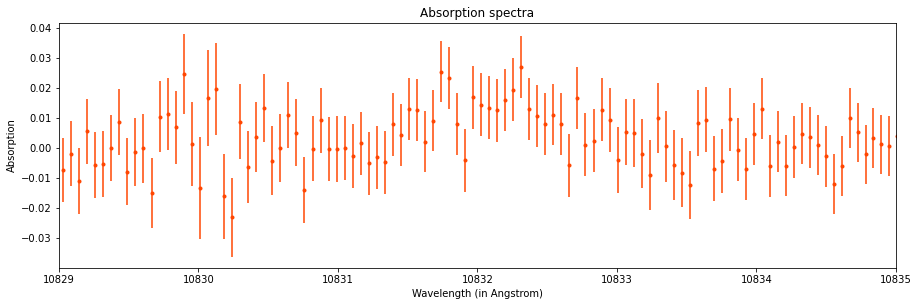

In [3]:
%matplotlib inline
lam_i, lam_e, abso, abso_e, date = np.loadtxt(path + '/data/HAT-P-11b_2017-08-12_22.rdb', 
                                              usecols=(0,1,2,3,4), unpack=True)
lambda_mid = (lam_i + lam_e)/2
plt.figure(figsize=(15,4.5))
plt.errorbar(lambda_mid, abso, yerr=abso_e, fmt='.', color = 'orangered')
plt.xlim([10829, 10835])
plt.xlabel('Wavelength (in Angstrom)')
plt.ylabel('Absorption')
plt.title('Absorption spectra')

**Comments:**
This spectrum is taken during the transit. We hardly guess an excess absorption close to 10832 ${\buildrel _{\circ} \over {\mathrm{A}}}$. Using a single spectrum is clearly not enough to clame a detection of absorption by the planet's atmosphere.

Read all the files in the data folder in a loop, and generate a 3d array "data" with all the data together (you can first append each 2d array to a list and then convert this list of 2d arrays to a 3d array with np.array).

In [4]:
data_list = os.listdir(path + '/data/')
data_list.sort(key = tools.natural_keys)
data = np.genfromtxt(path + '/data/' + data_list[0])
for i in range(len(data_list)-1):
    dat = np.genfromtxt(path + '/data/' + data_list[i+1])
    data = np.dstack([data, dat])
data1 = np.transpose(data) # This is the data we want to use later in the file. data1[0] would give one observation
                           # of the shape (5,335). While data1[0][2] would give an array with length 335 (i.e., 
                           # total wavelength range in one spectrum).
                           # data1[i][j][k] : ith observation, jth column, kth wavelength (i.e., raw)

### 2) Fig. 1 top left of A18

**a)**
In order to reproduce Fig. 1 of A18, we need to plot the absorption (as a percentage) as a function of the wavelength and the phase.
We already have the wavelength and absorption columns in our files, but not the phase.
The (orbital) phase is simply the time between the measurement and the closest transit rescaled by the orbital period.
A phase of 0 corresponds to the middle of the transit, while for a phase of 0.5, the planet is behind the star.
The transit of the planet starts approximately at phase -0.01 and ends approximately at phase 0.01.

Compute the vector of phases (at mid-exposure).

Use the tools.colormap function (see the description in tools.py)
to reproduce Fig. 1 (top left).
Specify the limits of the x-axis to the range [10829, 10835]
and force the colorbar to the range [0.25, 1.25].

**b)**
Using the transit duration, and the period, compute the exact value of the phase at the beginning and end of transit, and add the two dashed orange lines of Fig. 1 to your graph.

**c)**
Let us now compute the 3 green lines,
which correspond to the expected position of the signature of absorption by the planet
in the helium I triplet lines.
Indeed, each of the spectra we are plotting has been shifted to the rest frame of the star.
But the planet is moving in the rest frame of the star,
and the helium I absorption occurs in its atmosphere, so in the rest frame of the planet.
The theoretical positions of the helium triplet lines
(in the rest frame of the absorbing helium) are
10832.06, 10833.22, and 10833.31 ${\buildrel _{\circ} \over {\mathrm{A}}}$.
We first need to compute for each spectrum (each orbital phase)
the radial velocity of the planet in the rest frame of the star.
Then from this radial velocity, we can compute the wavelength at which the planet's helium absorption is seen in the rest frame of the star (Doppler shift).

Use the tools.star_rv to compute (for each orbital phase)
the stellar radial velocity around the center of mass of the system.
Deduce the radial velocity of the planet in the rest frame of the star.

Compute for the three helium lines and for each orbital phase
the wavelength of the expected absorption by the planet's atmosphere
(in the star rest frame),
and superimpose it to the graph.


(10829.0, 10835.0)

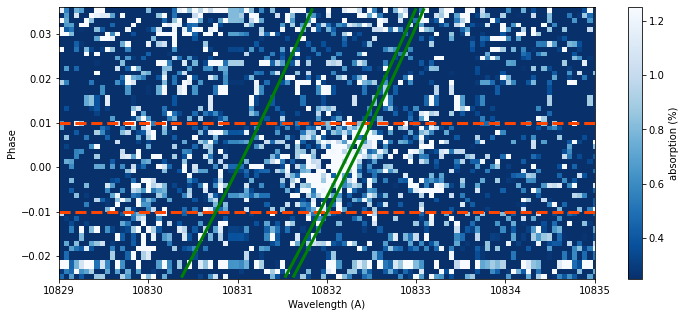

In [5]:
# a)
phase = np.array([])
tmid = np.array([])

for i in range(51):
    date1, date2 = data1[i][4][0], data1[i][4][1]
    d_mid = (date1 + date2)/2
    tmid = np.hstack((tmid, d_mid))
    t11 = T0_d + 618*P_d             # 618 must be the number of transit
    ph = (d_mid - t11)/P_d
    phase = np.hstack((phase, ph))

# Put it in the range [-0.5, 0.5[
phase = (phase + 0.5)%1 - 0.5

# Absorption data for each observation
abs_all = data1[:,2,:]
abs_all_e = data1[:,3,:]
# lambda_mid: same for each file, calculated earlier

# b)
phase_tr = T14_d/(2*P_d)

# c)
# Stellar velocity in the center of mass rest frame
rv_s_CM = tools.star_rv(phase, K_m_s, e, omega_rad)
# Planet velocity in the star rest frame
# By conservation of the total momentum:
# Ms * rv_s_CM + Mp * rv_p_CM = 0
# and
# rv_p_s = rv_p_CM - rv_s_CM
# Thus:
rv_p_s = -(Ms_Msun+Mp_Msun)/Mp_Msun * rv_s_CM

# Doppler shift
voc = rv_p_s/tools.c_m_s
# Relativistic formula
doppler_coef = np.sqrt((1+voc)/(1-voc))
#print(doppler_coef.shape)
# It would also be ok here to take the classical formula: doppler_coef = 1+voc
# Wavelengths of the planetary He triplet signature in the planetary rest frame
laHe0 = [10832.06, 10833.22, 10833.31]
# Wavelengths of the planetary He triplet signature in the rest frame of the star
laHe_1 = laHe0[0]*doppler_coef
laHe_2 = laHe0[1]*doppler_coef
laHe_3 = laHe0[2]*doppler_coef

# laHe_s is a 2d array indexed by the considered He line, and the phase of the planet

plt.figure(figsize=(12,5))
tools.colormap(lambda_mid, phase, 100*abs_all, vmin=0.25, vmax=1.25, clabel='absorption (%)')
plt.xlabel('Wavelength (A)')
plt.ylabel('Phase')
x111 = np.linspace(10829, 10835, len(lambda_mid))
plt.hlines(-phase_tr, xmin=10829, xmax=10835, linestyles='dashed', lw=3, colors='orangered')
plt.hlines(phase_tr, xmin=10829, xmax=10835, linestyles='dashed', lw=3, colors='orangered')
plt.plot(laHe_1, phase, 'g-', lw=3)
plt.plot(laHe_2, phase, 'g-', lw=3)
plt.plot(laHe_3, phase, 'g-', lw=3)
plt.xlim([10829, 10835])
#plt.savefig(path + '/image.pdf')

## 3) Fig. 1 top right of A18

We now want to shift the spectra in the rest frame of the planet.
We are especially interested in the range 10829-10835 ${\buildrel _{\circ} \over {\mathrm{A}}}$.
The Doppler shift in this range of wavelengths is almost constant (for a given phase).
In first approximation, we will use a constant value, computed at 10832 ${\buildrel _{\circ} \over {\mathrm{A}}}$ for each phase.
This shift in wavelength must then be converted in pixel.
Again, we assume the pixel size to be constant, such as the shift in pixel is also constant.
We also take the value of the pixel size around 10832 ${\buildrel _{\circ} \over {\mathrm{A}}}$.

We now need to shift each spectrum by the appropriate number of pixels (shift_pix).
However, shift_pix is obviously not an integer.
Let us decompose it in an integer part and a decimal part (between 0 and 1).

**a)**
Before performing the correct shift, we will first make a very crude approximation and neglect the decimal part.

Using np.nonzero get the array of indices that corresponds to the range 10829-10835 (i.e. a range of width 6 centered on 10832) in the stellar rest frame.

For each phase, compute the array of indices that corresponds to this range in the planet rest frame. You should obtain a list of array or a 2d array.

Plot the colormap corresponding to this crude approximation (integer pixel shift) and check that the features observed in the previous plot are straightened up.

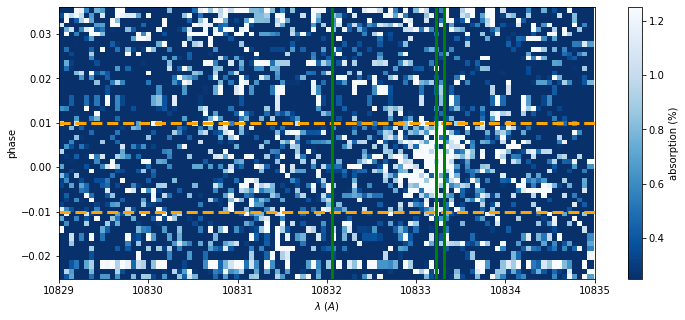

In [6]:
# Find the closest pixel to 10832 A
# lambda_mid is the mid value of lambda (comman for each observation)
k10832 = np.argmin(np.abs(lambda_mid-10832))
# print(k10832) ~ 266 - index of the pixel closest to the value 10832
# Compute its size
pixel_size = lam_e[k10832] - lam_i[k10832]
# print(pixel_size) ~ 0.0575
# In the following, we assume that all pixels have the same size
# Compute the Doppler shift in pixel "shift_pix"
# We again assume that the shift in pixel is the same for all wavelengths
# and compute it at 10832 A
# shift_pix is thus a 1d array: 1 value per spectrum
shift_pix = 10832*(doppler_coef-1)/pixel_size
# print("shift_pix",len(shift_pix)) ~ Array of length 51: 1 value per spectrum containing shifting
# Separate the shift in integer/decimal parts
# The np.floor function returns the biggest integer that is smaller (or equal) than the value
int_pix = np.floor(shift_pix).astype(int)
# Thus, dec_pix is in the range [0,1[
dec_pix = shift_pix - int_pix

# For now we neglect dec_pix
# Get the indices corresponding to the range [10829, 10835] in the stellar rest frame
inds_srf = np.nonzero(np.abs(lambda_mid-10832)<=3)[0]
#print(inds_srf) #~ array of size 104. Indices of values with wavelength in the range [10829, 10835]

# Apply the integer pixel shift to obtain indices corresponding
# to the range [10829, 10835] in the planetary rest frame
inds_prf = np.array([inds_srf + ipk for ipk in int_pix])
"""
Above command is a short-cut for the following,
inds_prf = inds_srf + int_pix[0]
for i in range(len(int_pix)-1):
    yy = inds_srf + int_pix[i+1]
    inds_prf = np.vstack((inds_prf, yy))
"""
# print(inds_prf[0])
# inds_prf is a 2d array (array of indices for each spectrum where absorption feature should be)
# Get the absorption values at these indices
#print(data1[0,2,inds_prf[0]])
absorp_intshift = np.array([data1[k, 2, indsk] for k, indsk in enumerate(inds_prf)])
"""
Above command is a short-cut for the following,
absorp_intshift = data1[0, 2, inds_prf[0]]
for i in range(len(int_pix)-1):
    yy = data1[i+1, 2, inds_prf[i+1]]
    absorp_intshift = np.vstack((absorp_intshift, yy))
"""

var_intshift = np.array([data1[k, 3, indsk] for k, indsk in enumerate(inds_prf)])

# print(absorp_intshift[0])
# for k, indsk in enumerate(inds_prf) will give k: nos. of spectrum (0,1,...,50),
#                                           indsk: array of len 104 containing indices
#                                                  where absorption feature should be.
# absorp_intshift would be 2D (51,104) array

# Plot it
plt.figure(figsize=(12,5))
tools.colormap(lambda_mid[inds_srf], phase, 100*absorp_intshift,
               vmin=0.25, vmax=1.25, clabel='absorption (%)')
plt.plot([10829, 10835], [phase_tr, phase_tr], '--', color='orange', lw=3)
plt.plot([10829, 10835], [-phase_tr, -phase_tr], '--', color='orange', lw=3)
#plt.plot(np.array([laHe0,laHe0]), np.array([np.full(3,phase.min()),np.full(3,phase.max())]), 'g-', lw=3)
plt.axvline(laHe0[0], c='g', ls='-', lw=3)
plt.axvline(laHe0[1], c='g', ls='-', lw=3)
plt.axvline(laHe0[2], c='g', ls='-', lw=3)
plt.xlim(10829, 10835)
plt.xlabel('$\lambda\ (A)$')
plt.ylabel('phase')
plt.show()
plt.close()

Just for fun, below, we plot the average spectrum using the integer shift spectrum we developed above. For the variance, we used the variance of the original spectrum

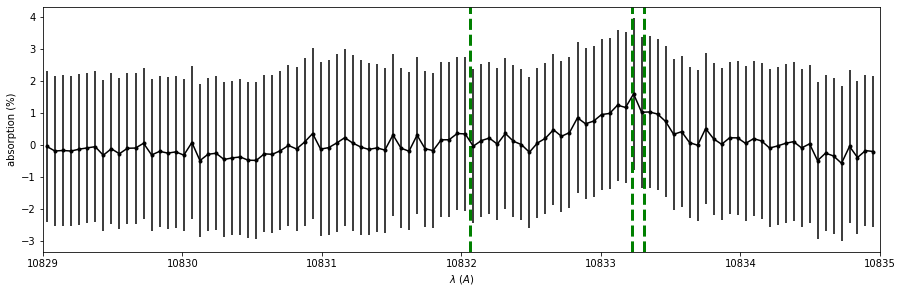

In [7]:
# Select in-transit spectra
k_tr = np.nonzero(np.abs(phase)<phase_tr)[0]
n_tr = k_tr.size
# Compute mean in-transit spectrum
mean_abs_int = np.sum(absorp_intshift[k_tr], axis=0)/n_tr
# Variance
var_mean_int = np.sum(var_intshift[k_tr], axis=0)/n_tr**2
# Plot (ignoring the covariance)
# The errorbar (standard deviation) is simply the square root of the variance.
plt.figure(figsize=(15,4.5))
plt.errorbar(lambda_mid[inds_srf], mean_abs_int*100, yerr=np.sqrt(var_mean_int)*100, fmt='k.-')
ylim = plt.ylim()
plt.axvline(laHe0[0], c='g', ls='--', lw=3)
plt.axvline(laHe0[1], c='g', ls='--', lw=3)
plt.axvline(laHe0[2], c='g', ls='--', lw=3)
plt.ylim(ylim)
plt.xlim(10829, 10835)
plt.xlabel('$\lambda\ (A)$')
plt.ylabel('absorption (%)')
plt.show()
plt.close()

**b)**
Let us now perform a more precise shift by also considering the decimal part of the pixel shift.
We want to estimate what would be the flux in a virtual pixel that is in between two real pixels.
We assume that inside each pixel, the photons are uniformly distributed.
Given the flux $f_i$, $f_{i+1}$ in pixel i and i+1, what would be the flux $g_i$ in a pixel that is shifted by $\alpha\in [0,1[$ from pixel i.
$f_i$, $f_{i+1}$ are random variables for which the standard deviation is known (error provided in the data files).
What is the variance of the random variable $g_i$ (we assume $f_i$ and $f_{i+1}$ to be independent).
What is the covariance between $g_i$ and $g_{i+1}$?
Between $g_i$ and $g_{i+2}$, etc.?
What is the covariance matrix of the shifted spectrum? And the correlation matrix?
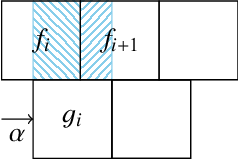

Given that $f_i$ and $f_{i+1}$ are _independent_ random variables with their value (i.e., flux) and errors in the value (i.e., errors in the flux) are known from the data file. We assume that they follow a random normal distribution with mean $\mu_i$ and standard deviation $\sigma_i$. That means,

$$f_i = \mathcal{N}(\mu_i, \sigma_i)$$

Since we also assumed that the photons are distributed uniformally on the pixels $f_i$, the total number of counts of photons on $g_i$ would simply be the weighted sum of $f_i$ and $f_{i+1}$ according to the given shift in pixel $\alpha$.

$$g_i = (1-\alpha)f_i + \alpha f_{i+1}$$

Using this formula one can easily calculate the expectation, variance and covariance between two successive pixels $g_i$ and $g_{i+1}$ as follows. First for the expectation value of $g_i$,

\begin{equation*}
    \begin{split}
        \mathbb{E} &= (1-\alpha)\mathbb{E}(f_i) + \alpha\mathbb{E}(f_{i+1}) \\
        &= (1-\alpha)\mu_i + \alpha\mu_{i+1}
    \end{split}
\end{equation*}

For the variance (and the standard deviation) in $g_i$,

\begin{equation*}
    \begin{split}
        var(g_i) &= (1-\alpha)^2 var(f_i) + \alpha^2 var(f_{i+1}) \\
        &= (1-\alpha)^2 \sigma_i^2 + \alpha^2 \sigma_{i+1}^2
    \end{split}
\end{equation*}

And thus,

$$\sigma_{g_i} = \sqrt{(1-\alpha)^2 \sigma_i^2 + \alpha^2 \sigma_{i+1}^2}$$

We now would like to calculate the covariance between successive pixels $g_i$ and $g_{i+1}$. Here, we should note that the covariance between successive pixels $f_i$ and $f_{i+1}$ was zero since we assumed that fluxes in two consecutive pixels were independent.

\begin{equation*}
    \begin{split}
        cov(g_i, g_{i+1}) &= cov[(1-\alpha)f_i + \alpha f_{i+1}, (1-\alpha)f_{i+1} + \alpha f_{i+1}] \\
        &= (1-\alpha)^2 cov(f_i, f_{i+1}) + \alpha (1-\alpha) cov(f_i, f_{i+2}) + (1-\alpha) \alpha cov(f_{i+1}, f_{i+1}) + \alpha^2 cov(f_{i+1}, f_{i+2}) \\
        &= \alpha (1-\alpha) cov(f_{i+1}, f_{i+1}) \\
        &= \alpha (1-\alpha) \sigma_{i+1}^2
    \end{split}
\end{equation*}

The covariance between $g_i$ and $g_{i+2}$, or pixels farther away is clearly 0, since they depend on different initial pixels (which are assumed to be independent).

The covariance matrix of the shifted spectrum is thus a tri-diagonal matrix (i.e. a matrix with zeros everywhere except on the main diagonal and the first sub and super diagonals:
$$ \begin{pmatrix}
  var(g_1) & cov(g_1,g_2) & 0 & \ldots & \ldots &0 \\
  cov(g_1,g_2) & var(g_2) & cov(g_2,g_3) & \ddots &  & \vdots \\
  0 & cov(g_2,g_3) & var(g_3) & cov(g_3,g_4) & \ddots & \vdots \\
  \vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
  \vdots &  & \ddots & \ddots & \ddots & cov(g_{n-1},g_n) \\
  0 & \ldots & \ldots & 0 & cov(g_{n-1},g_n) & var(g_n)\\
\end{pmatrix}. $$

The correlation matrix is also a tri-diagonal matrix
$$ \begin{pmatrix}
  1 & corr(g_1,g_2) & 0 & \ldots & \ldots &0 \\
  corr(g_1,g_2) & 1 & corr(g_2,g_3) & \ddots &  & \vdots \\
  0 & corr(g_2,g_3) & 1 & corr(g_3,g_4) & \ddots & \vdots \\
  \vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
  \vdots &  & \ddots & \ddots & \ddots & corr(g_{n-1},g_n) \\
  0 & \ldots & \ldots & 0 & corr(g_{n-1},g_n) & 1\\
\end{pmatrix} $$
with
$$ corr(g_i,g_{i+1}) = \frac{cov(g_i, g_{i+1})}{\sqrt{var(g_i)var(g_{i+1})}}. $$

**Note 1:**  
$f_i$ (and $g_i$) are random variables.
In the data files, the flux values that are provided are a **realization** of the random variables $f_i$, i.e. the values of $f_i$ computed from the result of a **single random experiment**.
The errorbars are an estimate of the standard deviation of $f_i$,
but we don't have any information about the expectation of $f_i$.
If we were able to determine exactly the expectation of $f_i$, we would be able to completely remove the uncertainty of the measurements, and we would not need to propagate any errorbar.

**Note 2:**  
We assume here that $f_i$ and $f_j$ are independent for $i\neq j$.
Several effects can make this hypothesis inaccurate.
First, while the photon noise affecting each pixel is independent, other sources of noise (e.g. CCD read noise)  might be correlated.
However, in our case the errors are dominated by photon noise and we can neglect read noise, etc.

Nevertheless, the spectra $f$ are not the raw spectra obtained from the instrument.
As explained above, several operations have been performed to obtain these spectra.
In particular, these spectra were shifted in the stellar rest frame, while they were initially taken in the Earth rest frame.
As you now know, such a shift introduces correlation between successive pixels, due to the decimal part of the pixel shift.
So in principle, we should take into account the correlation between successive pixels in $f$, and propagate it when reapplying a shift to compute $g$.

Let us now implement this.

Compute the shifted spectra in the planet rest frame, as well as the variance of each pixel, and the covariance and correlation between two successive pixels.

Plot the colormap.

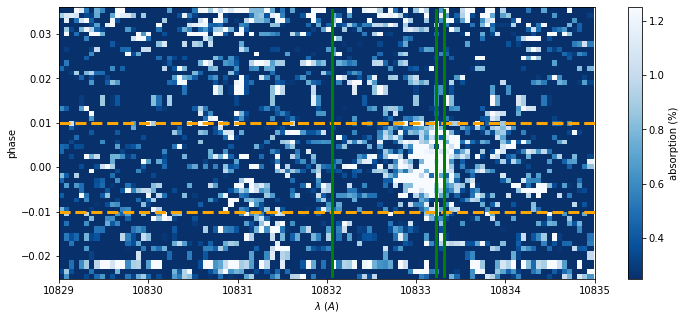

In [8]:
# Compute the absorption on shifted pixels (g_i = (1-alpha)f_i + alpha f_{i+1})
absorp = np.array([data1[k, 2, indsk]*(1-dec_pix[k])
                   + data1[k, 2, indsk+1]*dec_pix[k]
                   for k, indsk in enumerate(inds_prf)])

"""
Above command is the same as the following,
absorp = data1[0, 2, inds_prf[0]]*(1-dec_pix[0]) + data1[0, 2, inds_prf[1]]*dec_pix[0]
for i in range(len(inds_prf)-1):
    yy = data1[i+1, 2, inds_prf[i+1]]*(1-dec_pix[i+1]) + data1[i+1, 2, inds_prf[i+1]+1]*dec_pix[i+1]
    absorp = np.vstack((absorp, yy))
"""
# Variance
var_abs = np.array([(data1[k, 3, indsk]*(1-dec_pix[k]))**2
                    + (data1[k, 3, indsk+1]*dec_pix[k])**2
                    for k, indsk in enumerate(inds_prf)])
# Covariance between two successive pixels
cov_abs = np.array([data1[k, 3, indsk[1:]]**2*dec_pix[k]*(1-dec_pix[k])
                    for k, indsk in enumerate(inds_prf)])
# Correlation between two successive pixels
cor_abs = cov_abs/np.sqrt(var_abs[:,:-1]*var_abs[:,1:])

# Plot it
plt.figure(figsize=(12,5))
tools.colormap(lambda_mid[inds_srf], phase, 100*absorp,
               vmin=0.25, vmax=1.25, clabel='absorption (%)')
plt.plot([10829, 10835], [phase_tr, phase_tr], '--', color='orange', lw=3)
plt.plot([10829, 10835], [-phase_tr, -phase_tr], '--', color='orange', lw=3)
plt.plot(np.array([laHe0,laHe0]), np.array([np.full(3,phase.min()),np.full(3,phase.max())]), 'g-', lw=3)
plt.xlim(10829, 10835)
plt.xlabel('$\lambda\ (A)$')
plt.ylabel('phase')
plt.show()
plt.close()

### 4) Fig. 2 of A18 

**a)**
As we have seen in 1), individual transmission spectra do not show a strong and very significant feature at the helium triplet lines.
Now that we have correctly shifted the spectra in the planet rest frame, we can easily compute an average absorption spectrum in the planet rest frame,
which is our main objective.

We first need to select only the in-transit spectra.

Using np.nonzero, get the indices of the spectra that are in-transit.

Compute the average in-transit spectrum, the variance of each pixel and the covariance and correlation between two successive pixels.

Plot this average spectrum with errorbars (just ignore the covariance for the plot).
Comment this result in light of what you obtained with a single spectrum (question 1)).

**Answer:**  
The average spectrum is simply given by
$$ h_i = \frac{1}{n_\mathrm{tr}}\sum_s g_{s,i} $$
where the index $s$ identify the spectrum (at a given orbital phase) and $i$ identify the pixel (in the planet frame). $n_\mathrm{tr}$ is the number of spectra taken during the transit.

We assume that two different spectra are independent, so $cov(g_{s,i},g_{r,j})=0$ for $s\neq r$.
We thus find
$$ var(h_i) = var\left(\frac{1}{n_\mathrm{tr}}\sum_s g_{s,i}\right)
= \sum_s var\left(\frac{g_{s,i}}{n_\mathrm{tr}}\right)
= \sum_s \frac{var(g_{s,i})}{n_\mathrm{tr}^2}
= \frac{1}{n_\mathrm{tr}^2} \sum_s var(g_{s,i}). $$

Similarly, we find
$$ cov(h_i, h_{i+1}) = \frac{1}{n_\mathrm{tr}^2} \sum_s cov(g_{s,i},g_{s,i+1}). $$

And the correlation is (by definition)
$$ corr(h_i, h_{i+1}) = \frac{cov(h_i, h_{i+1})}{\sqrt{var(h_i)var(h_{i+1})}}. $$

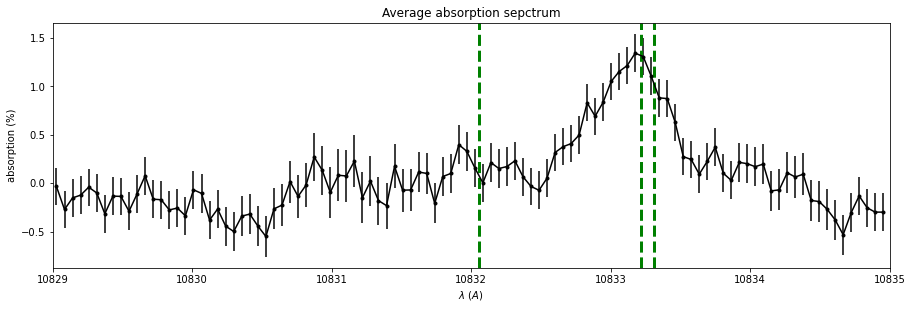

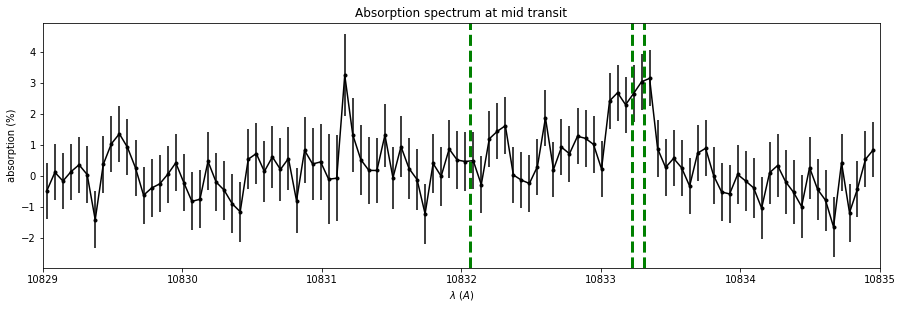

In [9]:
# Select in-transit spectra
k_tr = np.nonzero(np.abs(phase)<phase_tr)[0]
k_tr1 = np.nonzero(phase == np.min(np.abs(phase[k_tr])))[0]
n_tr = k_tr.size
# Compute mean in-transit spectrum
mean_abs = np.sum(absorp[k_tr], axis=0)/n_tr
# Variance
var_mean = np.sum(var_abs[k_tr], axis=0)/n_tr**2
# Covariance
cov_mean = np.sum(cov_abs[k_tr], axis=0)/n_tr**2
# Correlation
cor_mean = cov_mean/np.sqrt(var_mean[:-1]*var_mean[1:])

# Plot (ignoring the covariance)
# The errorbar (standard deviation) is simply the square root of the variance.
plt.figure(figsize=(15,4.5))
plt.errorbar(lambda_mid[inds_srf], mean_abs*100, yerr=np.sqrt(var_mean)*100, fmt='k.-')
ylim = plt.ylim()
plt.axvline(laHe0[0], c='g', ls='--', lw=3)
plt.axvline(laHe0[1], c='g', ls='--', lw=3)
plt.axvline(laHe0[2], c='g', ls='--', lw=3)
plt.ylim(ylim)
plt.xlim(10829, 10835)
plt.xlabel('$\lambda\ (A)$')
plt.ylabel('absorption (%)')
plt.title('Average absorption sepctrum')
plt.show()
plt.close()

plt.figure(figsize=(15,4.5))
plt.errorbar(lambda_mid[inds_srf], absorp[k_tr1[0]]*100, yerr=np.sqrt(var_abs[k_tr1[0]])*100, fmt='k.-')
ylim = plt.ylim()
plt.axvline(laHe0[0], c='g', ls='--', lw=3)
plt.axvline(laHe0[1], c='g', ls='--', lw=3)
plt.axvline(laHe0[2], c='g', ls='--', lw=3)
plt.ylim(ylim)
plt.xlim(10829, 10835)
plt.xlabel('$\lambda\ (A)$')
plt.ylabel('absorption (%)')
plt.title('Absorption spectrum at mid transit')
plt.show()
plt.close()

**Comments:**  
Compared to the single spectrum of question 1,
we now clearly see the absorption around the two lines on the right.
The absorption around the third line (on the left) is still unclear.
By averaging the spectra, the signal it-self should be at the exact same level as in the individual spectra.
However, the errors average out.
The final errorbars on the plot are much smaller (they are reduced by a factor of about $\sqrt{18}$, since we averaged 18 spectra, see computation of the variance).
This decreasing of the errorbars is also visible in the scatter of the points (which is much smaller in the average spectrum).

A good test to check if the propagation of errors has been done correctly is to compare the scatter of the points to the estimate of the errorbars.
If the estimated errorbars are much larger (resp. smaller) than the scatter, they probably have been overestimated (resp. underestimated).

**b)**
We now want to estimate how strong is the correlation between two pixels.

The shifts that we performed to obtain the spectra in the planet rest frame were of several pixels. 
We thus assume that the decimal part of these shifts are independent random variables that are uniformly distributed on $[0,1[$.
For this order of magnitude estimate, we additionnally assume that the initial errorbars on the spectra are all equals, with a value of $\sigma$.

Compute the expectation of the variance and covariance of two successive pixels of a shifted individual spectrum, assuming a random and uniformly distributed decimal part for the shift.

Compute the expectation of the variance and covariance for the average in-transit spectrum.
Deduce the expectation of the correlation in the limit of infinitely many stacked spectra.

Compare this analytical result with the mean correlation you obtained on the average spectrum.

**Answer:**  
We assume that the errors on the initial spectra are all equal to $\sigma$, i.e.
$$ var(f_{s,i}) = \sigma^2. $$
We deduce
$$ var(g_{s,i}) = ((1-\alpha_s)^2 + \alpha_s^2) \sigma^2 $$
and
$$ cov(g_{s,i},g_{s,i+1}) = \alpha_s(1-\alpha_s) \sigma^2. $$

We now assume that $\alpha_s$ are independent random variables uniformaly distributed on $[0,1[$.  
The variance and covariance of the shifted spectra are function of $\alpha$, so they are themselves random variables, for which we can compute the expectation with
$$ E(var(g_{s,i})) = \int_0^1 var(g_{s,i})(\alpha) \mathrm{d}\alpha = \left[\frac{1}{3}\left(\alpha^3-(1-\alpha)^3\right)\sigma^2\right]_0^1 = \frac{2}{3}\sigma^2, $$
$$ E(cov(g_{s,i},g_{s,i+1})) = \int_0^1 cov(g_{s,i},g_{s,i+1})(\alpha) \mathrm{d}\alpha = \frac{1}{6}\sigma^2. $$

For the average spectrum, we have
$$ var(h_i) = \frac{1}{n_\mathrm{tr}^2} \sum_s var(g_{s,i}), $$
thus
$$ E(var(h_i)) = \frac{1}{n_\mathrm{tr}^2} \sum_s E(var(g_{s,i})) = \frac{1}{n_\mathrm{tr}} \frac{2}{3} \sigma^2. $$

For the covariance, we find
$$ E(cov(h_i, h_{i+1})) = \frac{1}{n_\mathrm{tr}} \frac{1}{6}\sigma^2. $$

The correlation is by definition
$$ corr(h_i, h_{i+1}) = \frac{cov(h_i, h_{i+1})}{\sqrt{var(h_i)var(h_{i+1})}}
= \frac{cov(h_i, h_{i+1})}{var(h_i)}. $$
We must be a bit cautious here, because in the general case
$$ E\left(\frac{X}{Y}\right) \neq \frac{E(X)}{E(Y)}. $$
However, in the limit case where $n_\mathrm{tr}\to\infty$, we can prove the equality.
Indeed, we have
$$ corr(h_i, h_{i+1}) = \frac{\frac{1}{n_\mathrm{tr}^2} \sum_s cov(g_{s,i},g_{s,i+1})}{\frac{1}{n_\mathrm{tr}^2} \sum_s var(g_{s,i})}
= \frac{\frac{1}{n_\mathrm{tr}} \sum_s cov(g_{s,i},g_{s,i+1})}{\frac{1}{n_\mathrm{tr}} \sum_s var(g_{s,i})}
= \frac{E(cov(g_i,g_{i+1})) + a}{E(var(g_i)) + b}, $$
with
$$ a = \frac{1}{n_\mathrm{tr}} \sum_s cov(g_{s,i},g_{s,i+1}) - E(cov(g_i,g_{i+1})), $$
$$ b = \frac{1}{n_\mathrm{tr}} \sum_s var(g_{s,i}) - E(var(g_i)). $$
From the law of large numbers (see course), we deduce that $a,b\underset{n_\mathrm{tr}\to\infty}\longrightarrow 0$.

Therefore, 
$$ E(corr(h_i, h_{i+1})) \underset{n_\mathrm{tr}\to\infty}\longrightarrow \frac{E(cov(g_i,g_{i+1}))}{E(var(g_i))}
= \frac{1}{4}. $$

In [10]:
print("Mean correlation for each shifted spectrum:\n", np.mean(cor_abs[k_tr], axis=1))
print("\nMean correlation for the average spectrum:", np.mean(cor_mean))

Mean correlation for each shifted spectrum:
 [0.40195555 0.11071787 0.44192869 0.00553126 0.49094906 0.05114717
 0.49956178 0.04442004 0.4464659  0.10396429 0.36451817 0.1491902
 0.36341093 0.27614907 0.24691861 0.41768209 0.14325792 0.49959705]

Mean correlation for the average spectrum: 0.24133125390363336


**Comment:**  
We observe that for individual shifted spectra ($g_{s}$), the mean correlation between successive pixels varies a lot (from 0.0055 0.4996) due to the different values of the shift $\alpha$.
But the mean correlation between two successive pixels in the averaged spectrum ($h$) is 0.241 which is very close to the analytical estimate (0.25), even if several approximations were made to obtain this estimate:
- equal errorbars for all pixels and all spectra,
- independent uniform random shifts ($\alpha_s$),
- infinitely many spectra (while we have 18 in-transit spectra here).

Ideally, this correlation should be taken into account when analyzing the data, and fitting a model on it.
Indeed, this might impact the results, and especially the estimates of the errorbars on the physical parameters of the model.